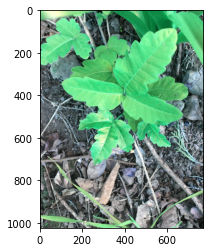

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/Users/Shreya/Downloads/plant-detection-data"
CATEGORIES = ["Poison Oak", "Poison Ivy"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

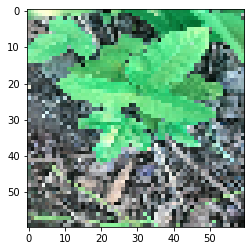

In [21]:
IMG_SIZE = 60

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [6]:
print(len(training_data))

20


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data:
    print(sample[1])

1
0
0
1
1
1
0
1
0
0
1
1
1
0
1
1
0
0
0
0


In [11]:
X = []
y = []

In [14]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [22]:
import pickle #saving dataset

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [15]:
X[1]

array([[[ 29],
        [ 63],
        [ 37],
        ...,
        [ 39],
        [ 30],
        [ 65]],

       [[ 22],
        [ 57],
        [ 21],
        ...,
        [ 56],
        [ 69],
        [ 63]],

       [[ 14],
        [ 57],
        [ 20],
        ...,
        [ 91],
        [ 89],
        [ 89]],

       ...,

       [[119],
        [103],
        [103],
        ...,
        [140],
        [124],
        [110]],

       [[110],
        [116],
        [ 87],
        ...,
        [ 94],
        [123],
        [119]],

       [[ 85],
        [105],
        [101],
        ...,
        [ 95],
        [126],
        [ 94]]], dtype=uint8)

In [37]:
#creating our convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

#normalize data
X = X/225.0

#building model

model = Sequential()


